# outlier with PCA

In [1]:
import torch as t
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## setup

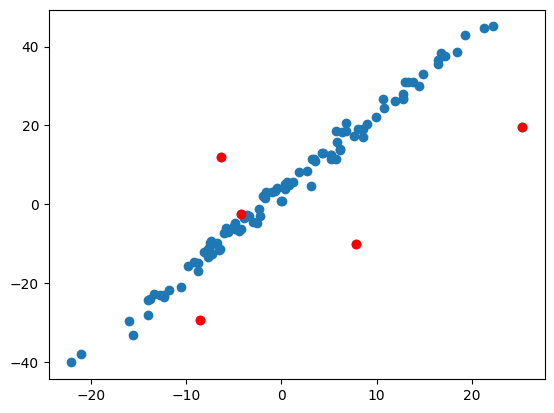

In [2]:
t.manual_seed(42)
xs = t.randn((1, 100)) * 10
ys = xs * 2 + 3 + t.randn((1, 100)) * 2

outliers = t.randn((2, 5)) * 20

data = t.cat((xs, ys), 0)
data = t.cat((data, outliers), 1).T
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(outliers[0], outliers[1], color='red')

## outlier

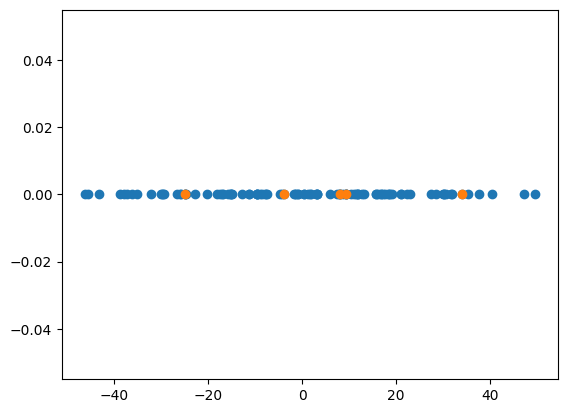

In [3]:
pca = PCA(n_components=1)
pca.fit(data)
flattened = pca.transform(data)
flat_outliers = pca.transform(outliers.T)
plt.scatter(flattened, t.zeros_like(t.tensor(flattened)))
plt.scatter(flat_outliers, t.zeros_like(t.tensor(flat_outliers)))

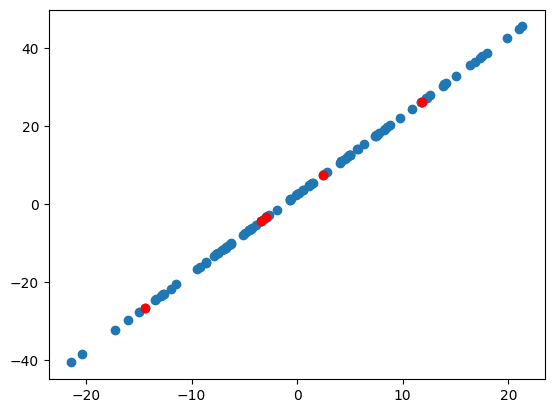

In [4]:
unflattened = t.tensor(pca.inverse_transform(flattened))
unflattened_outliers = t.tensor(pca.inverse_transform(flat_outliers))
plt.scatter(unflattened[:, 0], unflattened[:, 1])
plt.scatter(unflattened_outliers[:, 0], unflattened_outliers[:, 1], color='red')

In [6]:
t.sum((unflattened - data)**2, dim=1).topk(5)

torch.return_types.topk(
values=tensor([227.6766, 159.4756,  97.1991,  43.0019,   3.8298], dtype=torch.float64),
indices=tensor([102, 100, 103, 104,  59]))